## Análisis Exploratorio de Datos (EDA)

Llevaremos a cabo el Análisis Exploratorio de Datos (`EDA`) en cada conjunto de datos derivado del proceso de Extracción, Transformación y Carga (`ETL`). Al completar esta fase, adquiriremos una visión exhaustiva que facilitará la toma de decisiones respecto a las características seleccionadas para entrenar el modelo de recomendación. Este enfoque sistemático garantiza una comprensión detallada de los conjuntos de datos, permitiendo una selección informada de las variables más pertinentes en el contexto del desarrollo del modelo. 

### Importamos librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

### EDA del archivo "output_steam_games.parquet"

In [2]:
df_steam = pd.read_parquet("Datasets/output_steam_games.parquet")
df_steam.head(2)

,app_name,price,item_id,developer,release_year,genres
0,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018,Action
1,Ironbound,0.00,643980,Secret Level SRL,2018,Free to Play


In [3]:
 df_steam.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      28899 non-null  object 
 1   price         28899 non-null  float64
 2   item_id       28899 non-null  int64  
 3   developer     28899 non-null  object 
 4   release_year  28899 non-null  int64  
 5   genres        28899 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [4]:
df_steam.isnull().sum() # obtenemos la cantidad de valores nulos por columna

app_name        0
price           0
item_id         0
developer       0
release_year    0
genres          0
dtype: int64

### Variables categóricas

* **app_name**: nombre de la aplicación o juego
* **item_id**: identificador único del juego
* **developer**: desarrollador
* **release_year**: año de lanzamiento del juego
* **genres** : género del juego

#### Feature `genres`

In [5]:
cantidad_generos= df_steam["genres"].value_counts() # obtenemos la cantidad de juegos por género
cantidad_generos.to_frame

<bound method Series.to_frame of genres
Action                       11273
Casual                        4340
Adventure                     4322
Indie                         3301
Simulation                    1844
Strategy                      1126
RPG                            682
Free to Play                   516
Racing                         454
Design &amp; Illustration      327
Animation &amp; Modeling       179
Pending classification         136
Utilities                       93
Audio Production                79
Sports                          63
Massively Multiplayer           49
Education                       46
Video Production                21
Software Training               21
Web Publishing                   8
Photo Editing                    8
Accounting                       7
Early Access                     4
Name: count, dtype: int64>

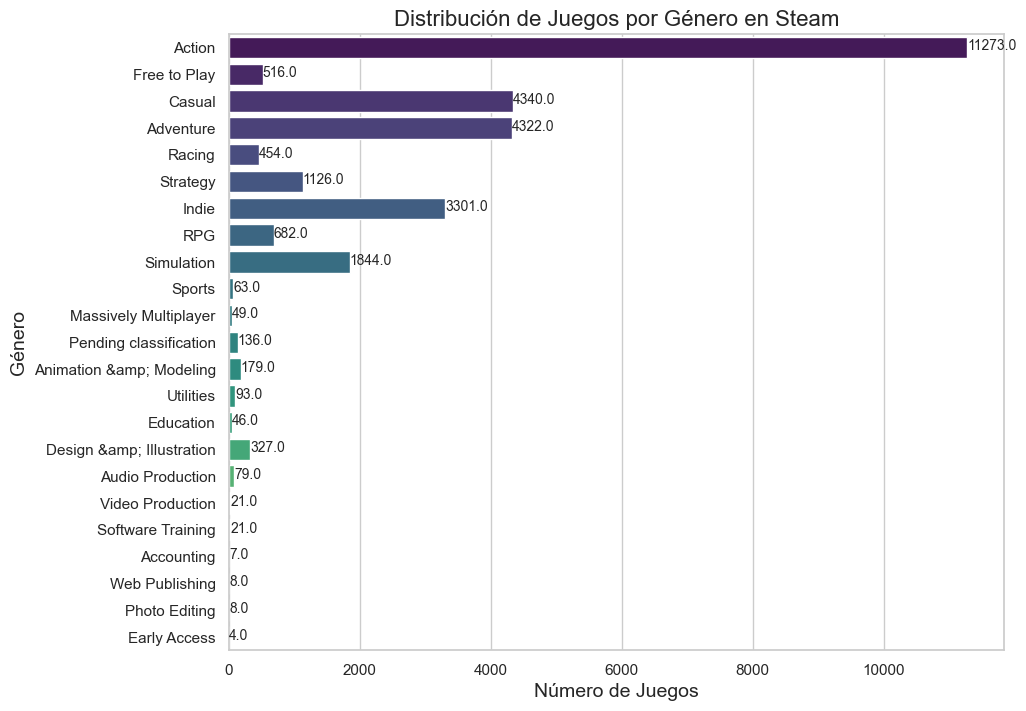

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_steam, y='genres', orient='h', palette='viridis')

ax.set_title('Distribución de Juegos por Género en Steam', fontsize=16)
ax.set_xlabel('Número de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + 0.5), fontsize=10)

plt.show()

**Observación**

- Los generos con mayor cantidad de juegos son: `Action`, `Casual` , `Adventure` e `Indie`

#### Feature `item_id`

In [7]:
cantidad_juegos = len(df_steam["item_id"].unique()) # obtenemos la cantidad de software único presente en Steam
cantidad_juegos

28899

**Observación**
- Steam posee la cantidad de 28899 productos únicos (software) en su catálogo.

#### Feature `release_year`

In [8]:
lanzamiento_por_anio = df_steam["release_year"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
lanzamiento_por_anio

release_year
2017    9201
2016    6712
2015    5084
2014    2739
2013    1459
2012    1159
2011     553
2010     403
2009     320
2008     196
2007     150
2006     143
2018      92
2005      92
2003      74
2004      64
2001      59
1998      50
1999      48
2002      42
1997      39
1996      36
2000      36
1994      32
1995      31
1993      25
1992      13
1991      12
1990      10
1989       7
1988       5
1987       4
2019       3
1984       2
1983       1
1986       1
2021       1
1985       1
Name: count, dtype: int64

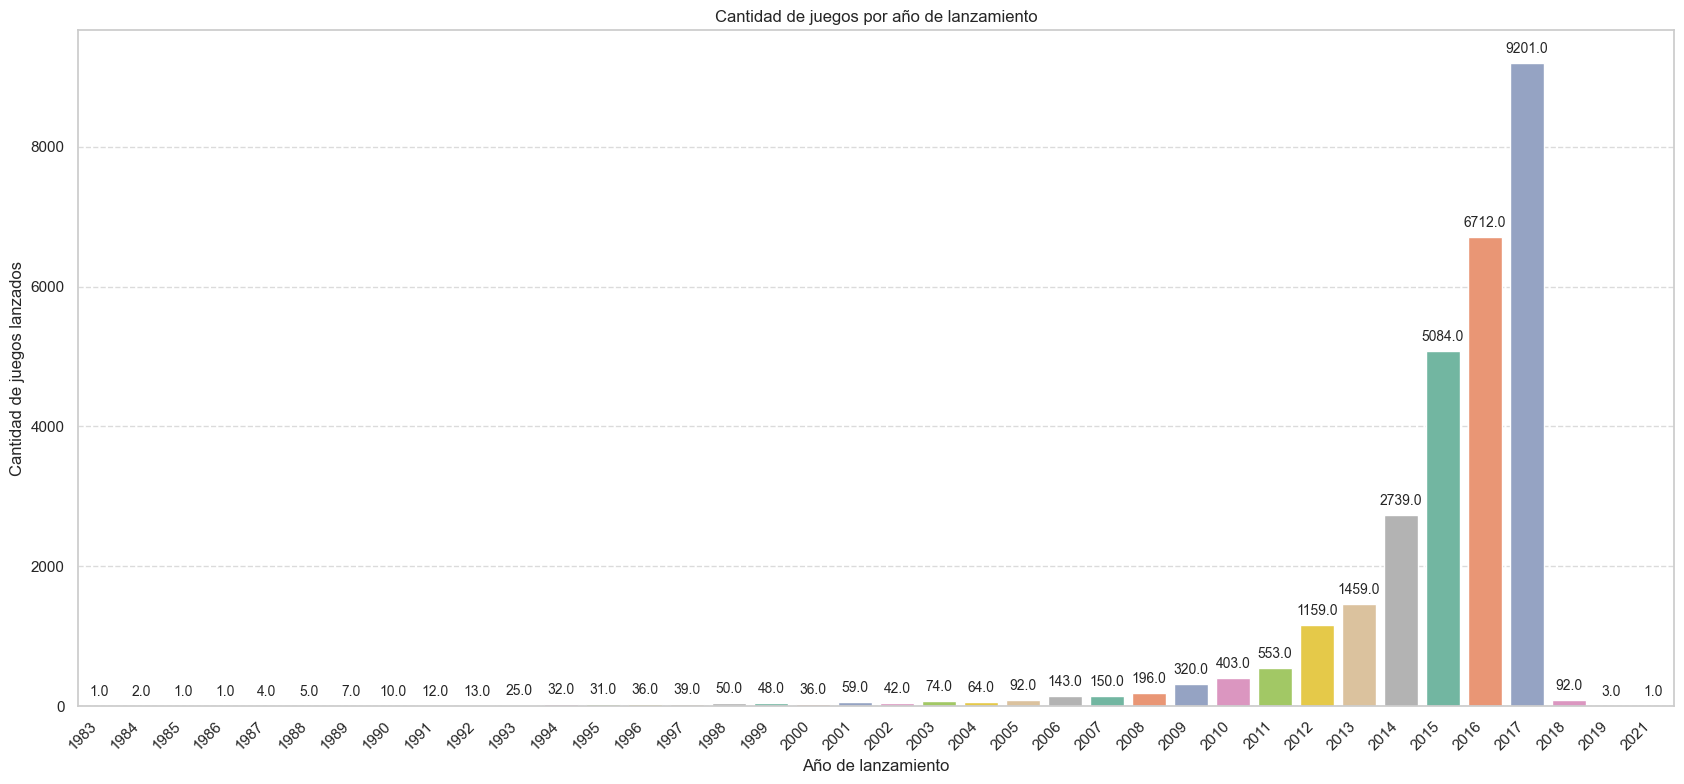

In [9]:
lanzamiento_por_anio = lanzamiento_por_anio.sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(17, 8))

ax = sns.barplot(x=lanzamiento_por_anio.index, y=lanzamiento_por_anio.values, palette="Set2")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set(xlabel='Año de lanzamiento', ylabel='Cantidad de juegos lanzados',
       title='Cantidad de juegos por año de lanzamiento')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observación**
 
 - Aunque Steam se introdujo en 2003 como una plataforma para la actualización de juegos de Valve, no fue hasta 2007 que amplió su modelo de negocio para incluir software de terceros. Esto explica la baja cantidad de juegos desarrollados antes de 2007, presentes en su catálogo. A partir de ese año, se observa un crecimiento exponencial en la cantidad de juegos lanzados anualmente, alcanzando su punto máximo en 2017 con 9201 títulos lanzados.

#### Feature `developer`

In [10]:
developer = df_steam["developer"].value_counts() # obtenemos la cantidad de juegos por desarrollador
developer

developer
Ubisoft - San Francisco                     1259
SmiteWorks USA, LLC                          813
Dovetail Games                               253
KOEI TECMO GAMES CO., LTD.                   232
Paradox Development Studio                   156
                                            ... 
Salus Games                                    1
Class of  2016-2017                            1
Pirotexnik                                     1
ElVery333,Raquel Covelo Suarez,ATopeCode       1
Bidoniera Games                                1
Name: count, Length: 11011, dtype: int64

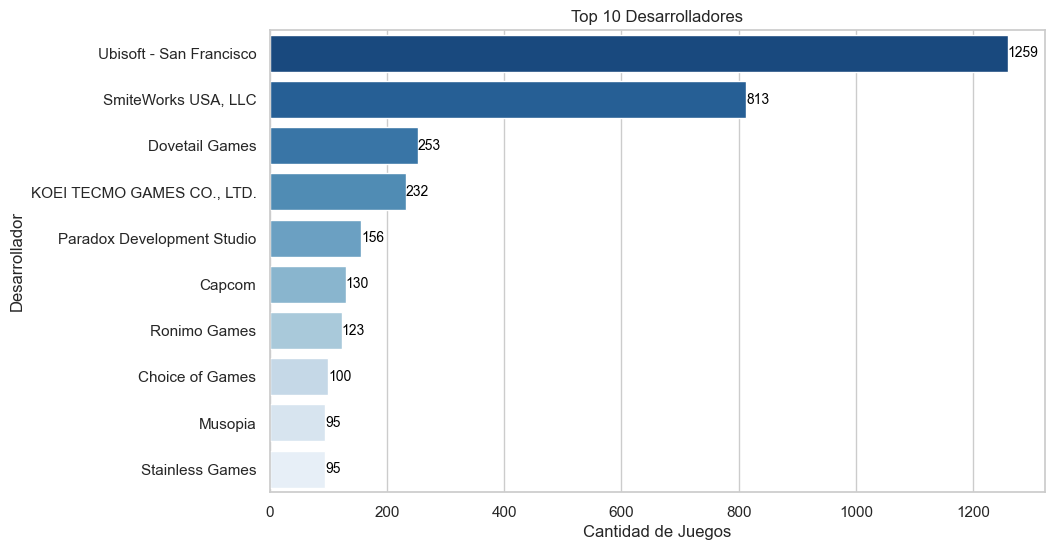

In [11]:
sns.set(style="whitegrid")

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 6))

developer_data = developer[:10]
sns.barplot(x=developer_data.values, y=developer_data.index, palette="Blues_r")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores')

# Añadimos etiquetas en las barras
for i, v in enumerate(developer_data.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

**Observación**
- El mayor desarrollador de juegos es ´Ubisoft - San Francisco´ con 1259 juegos en Steam.

### EDA del archivo "australian_user_reviews.parquet"

In [3]:
df_reviews = pd.read_parquet("Datasets/australian_user_reviews.parquet")
df_reviews.head(2)

,user_id,item_id,recommend,sentiment_analysis,posted_year
0,76561197970982479,1250,True,2,2011
1,76561197970982479,22200,True,1,2011


In [13]:
df_reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   item_id             59161 non-null  int64 
 2   recommend           59161 non-null  bool  
 3   sentiment_analysis  59161 non-null  int64 
 4   posted_year         59161 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.9+ MB


In [14]:
df_reviews.isnull().sum() # obtenemos la cantidad de valores nulos por columna

user_id               0
item_id               0
recommend             0
sentiment_analysis    0
posted_year           0
dtype: int64

#### Variables categóricas

* **user_id** : identificación del usuario de plataforma
* **recommend** : valor booleano que indica si se ha realizado review
* **sentiment_analisis** : clasificación de las reviews en:
    * positivo = 2 
    * negativo = 0 
    * neutral = 1

#### Feature `user_id`

In [15]:
# se contabiliza la cantidad de usuarios de juegos Steam que hay en la plataforma 
cantidad_users= len(df_reviews["user_id"].unique())
cantidad_users

25467

**Observación**
- Contamos con 25467 usuarios únicos en el dataset. 

#### Feature `recommend`

Se cuentan la cantidad de recomendaciones hechas

In [16]:
cant_recomend= df_reviews["recommend"].value_counts()
cant_recomend

recommend
True     52350
False     6811
Name: count, dtype: int64

**Observación**
- Contabilizamos mas de 50000 recomendaciones por lo que se deduce que los usuarios realizan múltiples reviews.

#### Feature `sentiment_analisis`

In [17]:
#realizo el conteo de cada una de las categorias de sentimientos
cant_sent= df_reviews["sentiment_analysis"].value_counts()
cant_sent

sentiment_analysis
2    32181
1    22000
0     4980
Name: count, dtype: int64

**Observación**
- Las reviews con sentimientos positivos fueron 32181
- Las reviews con sentimientos neutrales fueron 22000
- Las reviews con sentimientos negativos fueron 4980

#### c) Tratamiento Variables numéricas

* **posted_year** : fecha en que se realiza la review

#### Feature `posted_year`

In [22]:
fecha=df_reviews["posted_year"].describe()
fecha

count    59161.000000
mean      2013.934129
std          1.098929
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: posted_year, dtype: float64

Realizamos un histograma de fechas de posteo

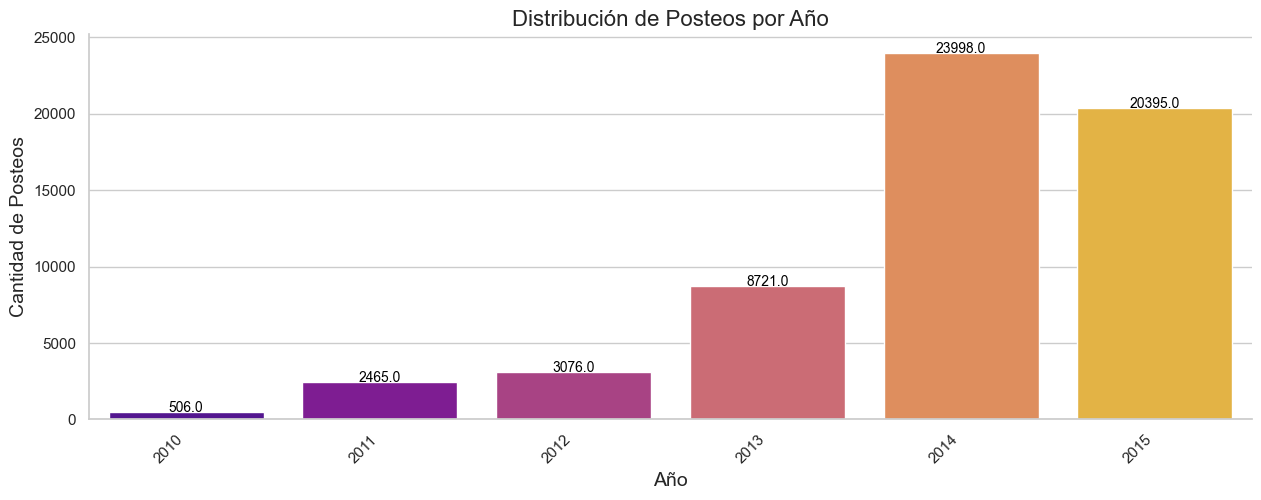

In [23]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(15, 5))

ax = sns.countplot(data=df_reviews, x=df_reviews["posted_year"], palette="plasma")  # Agrega una coma aquí

ax.set_title('Distribución de Posteos por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Posteos', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()

**Observación**
- La cantidad total de posteos es de 59161.
- El año con más posteos fue 2014 con 23998 

### 3- EDA de `user_items.parquet`

#### a) Extracción y revisión de nulos y duplicados

Se extrae el dataset que resulto luego del ETL

In [4]:
df_items = pd.read_parquet("Datasets/australian_users_items.parquet")
df_items.head(2)

,item_id,item_name,steam_id,items_count,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,277,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,277,76561197970982479,0.12


In [29]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246375 entries, 0 to 3246374
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   item_id         int64  
 1   item_name       object 
 2   steam_id        int64  
 3   items_count     int64  
 4   user_id         object 
 5   playtime_hours  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB


In [30]:
df_items.isnull().sum()

item_id           0
item_name         0
steam_id          0
items_count       0
user_id           0
playtime_hours    0
dtype: int64

#### Variables categóricas

* **item_name** : titulo del juego Steam

#### Feature `item_name`

In [31]:
cant_juegos = len(df_items["item_name"].unique()) # obtenemos la cantidad de software único presente en Steam
cant_juegos

10024

In [32]:
juego = df_items["item_name"].value_counts() # obtenemos la cantidad de juegos por nombre
juego

item_name
Counter-Strike: Global Offensive    42842
Garry's Mod                         41639
Left 4 Dead 2                       34535
Unturned                            34089
Terraria                            28244
                                    ...  
Castles                                 1
The Empty Inn                           1
Dr. Bulbaceous                          1
Cue Club 2                              1
Arachnophobia                           1
Name: count, Length: 10024, dtype: int64

**Observación**
- Steam cuenta con la cantidad de 10024 productos únicos (software) en su catálogo.
- El software mas consumido es "Counter-Strike: Global Offensive" con 42842 registros

#### Variables numéricas

* **items_count** : cantidad de juegos Steam que consume un usuario
* **playtime_forever** : cantidad de tiempo que juega un usuario

#### Feature `items_count`

In [33]:
items_count = df_items.groupby('user_id')['items_count'].unique().explode() # obtenemos la cantidad de juegos por usuario
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('items_count', ascending=False) # ordenamos de mayor a menor
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198072737788,1
76561198069543256,1
76561198063914266,1


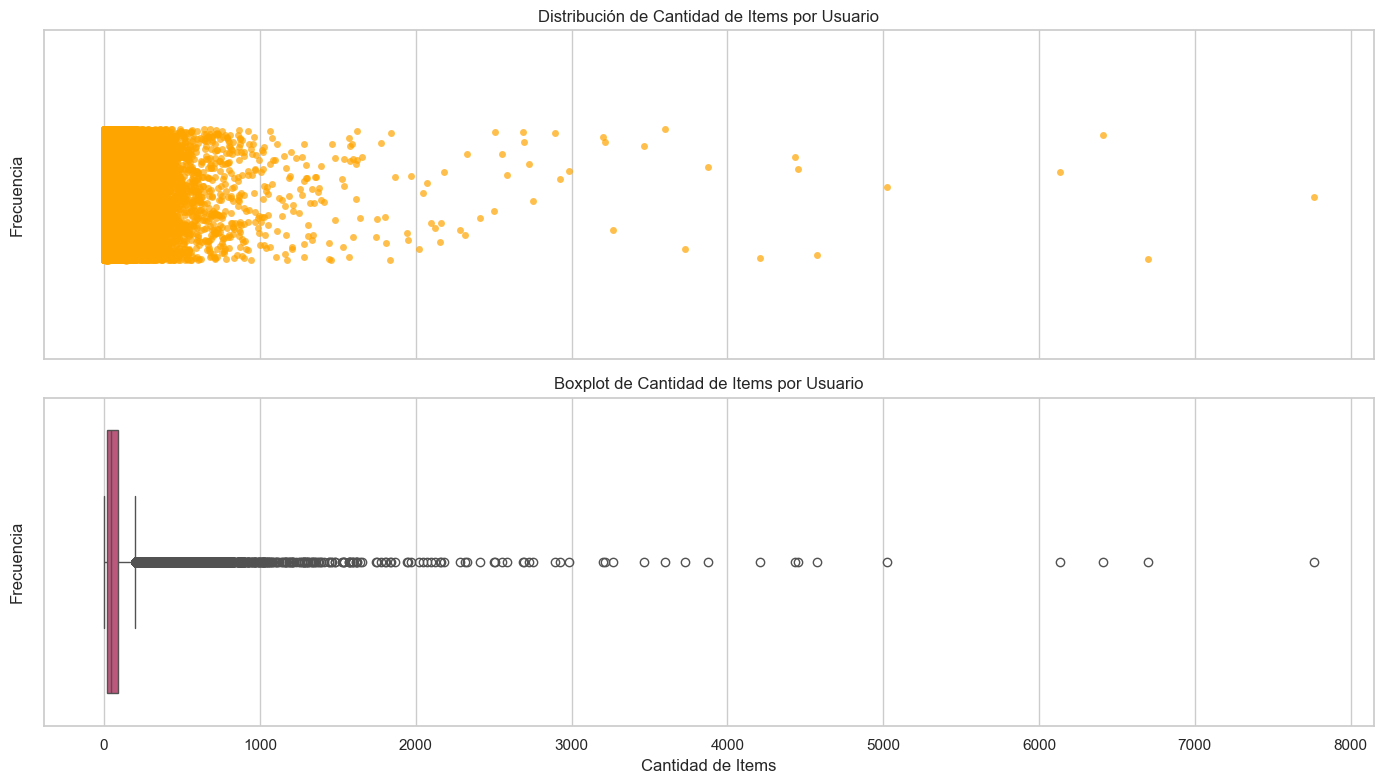

In [34]:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=items_count_user, x='items_count', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Items por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=items_count_user, x='items_count', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Items por Usuario')

plt.tight_layout()
plt.show()


In [35]:
items_count_user.describe()

,items_count
count,68403
unique,924
top,2
freq,1545


**Observación**
- La cantidad total artículos consumidos es de 68403. 
- El `user_id` con más cantidad de artículos consumidos es `phrostb` con 7762

#### Feature `playtime_hours`

In [37]:
time_count = df_items.groupby('user_id')['playtime_hours'].unique().explode()  # Obtenemos el tiempo de juego por usuario
time_count = pd.DataFrame(time_count)  # Convertimos a DataFrame
time_count['playtime_hours'] = time_count['playtime_hours']
time_count_user = time_count.sort_values('playtime_hours', ascending=False)  # Ordenamos de mayor a menor
time_count_user

,playtime_hours
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13
...,...
76561198078062945,0.02
76561198101995099,0.02
76561198066935199,0.02


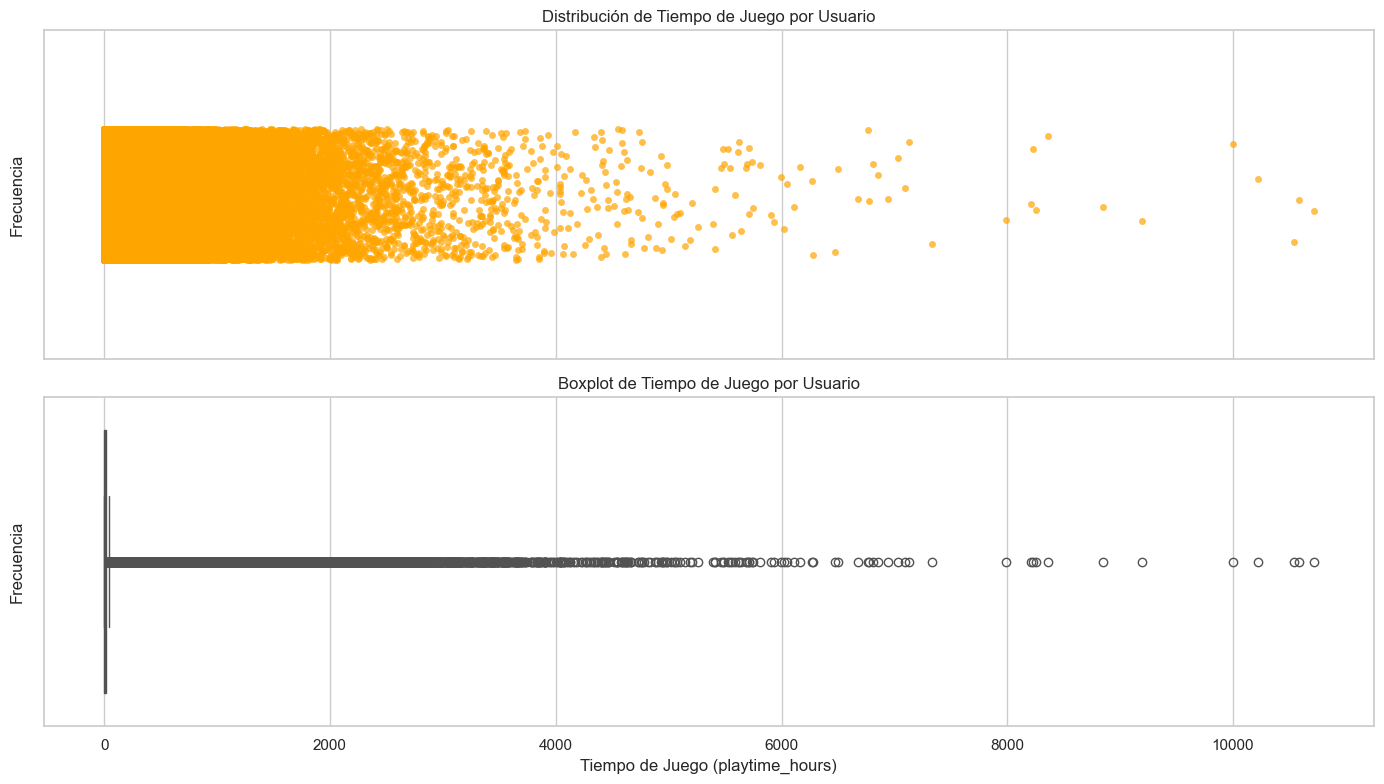

In [38]:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=time_count_user, x='playtime_hours', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Tiempo de Juego (playtime_hours)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Tiempo de Juego por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=time_count_user, x='playtime_hours', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Tiempo de Juego (playtime_hours)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Tiempo de Juego por Usuario')

plt.tight_layout()
plt.show()

**Observación**
- El `user_id` con más cantidad de tiempo consumido en juegos Steam es `wolop` con 10713 horas

## Preparamos los dataset para las funciones de los endpoints y el modelo de recomendación

## * Dataset para funciones de los endpoints

#### Para las primeras dos funciones, empleamos los archivos 'output_steam_games.parquet' y 'australian_users_items.parquet'. Inicialmente, se consideró fusionarlos utilizando el valor común de los tres archivos, que es el item_id. Sin embargo, dado el considerable tamaño del segundo archivo y las modificaciones en la información, se optó por trabajar con ambos archivos de manera independiente.
#### En cuanto a las otras tres funciones, que requerían el uso de los archivos 'output_steam_games.parquet' y 'australian_user_reviews.parquet', se decidió realizar un merge (unión de conjuntos de datos por un valor común). Debido a que ambos archivos tenían un tamaño similar, se aplicó esta fusión, y para evitar posibles inconvenientes, se filtró el contenido comprendido entre los años 2010 y 2015, ya que ambos conjuntos comparten dicha información.

In [5]:
df_games = df_steam[df_steam['release_year'].between(2010, 2015, inclusive='both')] # filtramos los juegos lanzados entre 2010 y 2015
df_games.head(2)

,app_name,price,item_id,developer,release_year,genres
9,Uncanny Islands,0.0,768570,Qucheza,2015,Action
34,United Tactics,0.0,662570,Zachary M Thomas,2015,Strategy


In [6]:
df_reviews = df_reviews[df_reviews['posted_year'].between(2010, 2015, inclusive='both')] # filtramos los reviews realizados entre 2010 y 2015
df_reviews.head(2)

,user_id,item_id,recommend,sentiment_analysis,posted_year
0,76561197970982479,1250,True,2,2011
1,76561197970982479,22200,True,1,2011


In [7]:
# Unimos los DataFrames
df_games_and_reviews = pd.merge(df_games, df_reviews, left_on='item_id', right_on='item_id')

In [8]:
df_games_and_reviews.head(2) # visualizamos el dataframe

,app_name,price,item_id,developer,release_year,genres,user_id,recommend,sentiment_analysis,posted_year
0,"Pirates, Vikings, and Knights II",0.0,17570,Octoshark Studios,2010,Action,76561198010653835,True,2,2015
1,"Pirates, Vikings, and Knights II",0.0,17570,Octoshark Studios,2010,Action,76561198075581042,True,2,2014


In [9]:
df_games_and_reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35097 entries, 0 to 35096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   app_name            35097 non-null  object 
 1   price               35097 non-null  float64
 2   item_id             35097 non-null  int64  
 3   developer           35097 non-null  object 
 4   release_year        35097 non-null  int64  
 5   genres              35097 non-null  object 
 6   user_id             35097 non-null  object 
 7   recommend           35097 non-null  bool   
 8   sentiment_analysis  35097 non-null  int64  
 9   posted_year         35097 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 2.4+ MB


### Creamos el archivo

In [10]:
df_games_and_reviews.to_csv("Datasets/games_and_reviews.csv", index=False, encoding="utf-8") # guardamos el dataframe en un archivo csv

In [11]:
df_games_and_reviews = pd.read_csv("Datasets/games_and_reviews.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(df_games_and_reviews) # convertimos el dataframe en una tabla
pq.write_table(tabla,"Datasets/games_and_reviews.parquet") # guardamos la tabla en un archivo parquet

## * Dataset para el Modelo de Recomendación

In [39]:
modelo_item = pd.read_parquet("Datasets/output_steam_games.parquet")
modelo_item

,app_name,price,item_id,developer,release_year,genres
0,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018,Action
1,Ironbound,0.00,643980,Secret Level SRL,2018,Free to Play
2,Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017,Casual
3,弹炸人2222,0.99,767400,彼岸领域,2017,Action
4,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018,Action
...,...,...,...,...,...,...
28894,Kebab it Up!,1.99,745400,Bidoniera Games,2018,Action
28895,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",2018,Casual
28896,LOGistICAL: South Africa,4.99,733530,Sacada,2018,Casual
28897,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018,Indie


Creamos un dataframe con las columnas que utilizaremos: `item_id`, `app_name` y `genre`

In [40]:
modelo_item = modelo_item[["item_id", "app_name", "genres"]]
modelo_item

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,643980,Ironbound,Free to Play
2,670290,Real Pool 3D - Poolians,Casual
3,767400,弹炸人2222,Action
4,772540,Battle Royale Trainer,Action
...,...,...,...
28894,745400,Kebab it Up!,Action
28895,773640,Colony On Mars,Casual
28896,733530,LOGistICAL: South Africa,Casual
28897,610660,Russian Roads,Indie


In [41]:
modelo_item.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   28899 non-null  int64 
 1   app_name  28899 non-null  object
 2   genres    28899 non-null  object
dtypes: int64(1), object(2)
memory usage: 677.4+ KB


### Creamos el archivo

In [60]:
modelo_item = modelo_item.copy() # Creamos una copia del dataframe

In [61]:
modelo_item.to_csv("Datasets/modelo_item.csv", index=False, encoding='utf-8') # Exportamos el dataframe a csv

In [66]:
modelo_item = pd.read_csv("Datasets/modelo_item.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(modelo_item) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"Datasets/modelo_item.parquet") # exportamos la tabla a parquet